In [50]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [19]:
FINNISH_NUM2WORDS = {
    1: 'yksi',
    2: 'kaksi',
    3: 'kolme',
    4: 'neljä',
    5: 'viisi',
    6: 'kuusi',
    7: 'seitsemän',
    8: 'kahdeksan',
    9: 'yhdeksän',
    10: 'kymmenen'
}

In [20]:
FINNISH_NUM2WORDS_SPOKEN = {
    1: 'yks',
    2: 'kaks',
    3: 'kol',
    4: 'nel',
    5: 'viis',
    6: 'kuus',
    7: 'seittemän',
    8: 'kasi',
    9: 'ysi',
    10: 'kymmene'
}

In [21]:
PLACE_WORDS = {
    0: {'plural': '', 'singular': ''},
    1: {'plural': 'tuhatta', 'singular': 'tuhat'},
    2: {'plural': 'miljoonaa', 'singular': 'miljoona'},
    3: {'plural': 'miljardia', 'singular': 'miljardi'},
    4: {'plural': 'biljoonaa', 'singular': 'biljoona'},
    5: {'plural': 'biljardia', 'singular': 'biljardi'},
    6: {'plural': 'triljoonaa', 'singular': 'triljoona'},
    7: {'plural': 'triljardia', 'singular': 'triljardi'},
    8: {'plural': 'kvadriljoonaa', 'singular': 'kvadriljoona'},
    9: {'plural': 'kvadriljardia', 'singular': 'kvadriljardi'},
    10: {'plural': 'kvintiljoonaa', 'singular': 'kvintiljoona'},
    11: {'plural': 'kvintiljardia', 'singular': 'kvintiljardi'},
    12: {'plural': 'sekstiljoonaa', 'singular': 'sekstiljoona'},
    13: {'plural': 'sekstiljardia', 'singular': 'sekstiljardi'},
    14: {'plural': 'septiljoonaa', 'singular': 'septiljoona'},
    15: {'plural': 'septiljardia', 'singular': 'septiljardi'},
    16: {'plural': 'oktiljoonaa', 'singular': 'oktiljoona'},
    17: {'plural': 'oktiljardia', 'singular': 'oktiljardi'},
    18: {'plural': 'noviljoonaa', 'singular': 'noviljoona'},
    19: {'plural': 'noviljardia', 'singular': 'noviljardi'},
    20: {'plural': 'dekiljoonaa', 'singular': 'dekiljoona'},
    21: {'plural': 'dekiljardia', 'singular': 'dekiljardi'},
    22: {'plural': 'undekiljoonaa', 'singular': 'undekiljoona'},
    23: {'plural': 'undekiljardia', 'singular': 'undekiljardi'},
    24: {'plural': 'duodekiljoonaa', 'singular': 'duodekiljoona'},
    25: {'plural': 'duodekiljardia', 'singular': 'duodekiljardi'},
    26: {'plural': 'tredekiljoonaa', 'singular': 'tredekiljoona'},
    27: {'plural': 'tredekiljardia', 'singular': 'tredekiljardi'},
    28: {'plural': 'kvattuordekiljoonaa', 'singular': 'kvattuordekiljoona'},
    29: {'plural': 'kvattuordekiljardia', 'singular': 'kvattuordekiljardi'},
    30: {'plural': 'kvindekiljoonaa', 'singular': 'kvindekiljoona'},
    31: {'plural': 'kvindekiljardia', 'singular': 'kvindekiljardi'},
    32: {'plural': 'sedekiljoonaa', 'singular': 'sedekiljoona'},
    33: {'plural': 'sedekiljardia', 'singular': 'sedekiljardi'},
    34: {'plural': 'septendekiljoonaa', 'singular': 'septendekiljoona'},
    35: {'plural': 'septendekiljardia', 'singular': 'septendekiljardi'},
    36: {'plural': 'duodevigintiljoonaa', 'singular': 'duodevigintiljoona'},
    37: {'plural': 'duodevigintiljardia', 'singular': 'duodevigintiljardi'}
}

In [22]:
def tens(number):
    if number > 19:
        return f'{FINNISH_NUM2WORDS[number//10]}kymmentä'
    elif number > 10:
        return f'{FINNISH_NUM2WORDS[number-10]}toista'
    else:
        return f'{FINNISH_NUM2WORDS[number]}'

In [42]:
def tens_spoken(number):
    if number > 69 and number < 80:
        return f'{seiskyt}'
    elif number > 19:
        return f'{FINNISH_NUM2WORDS_SPOKEN[number//10]}kyt'
    elif number == 13:
        return f'kolmetoist'
    elif number > 10:
        return f'{FINNISH_NUM2WORDS_SPOKEN[number-10]}toist'
    else:
        return f'{FINNISH_NUM2WORDS_SPOKEN[number]}'

In [24]:
def singles(number):
    if number != 0:
        return f'{FINNISH_NUM2WORDS[number]}'
    return ''

In [25]:
def singles_spoken(number):
    if number != 0:
        return f'{FINNISH_NUM2WORDS_SPOKEN[number]}'
    return ''

In [26]:
def hundreds(number):
    if number > 1:
        return f'{FINNISH_NUM2WORDS[number]}sataa'
    else:
        return 'sata'

In [27]:
def hundreds_spoken(number):
    if number > 1:
        return f'{FINNISH_NUM2WORDS_SPOKEN[number]}sataa'
    else:
        return 'sata'

In [28]:
def thousands(number):
    if number > 1:
        return f'{FINNISH_NUM2WORDS[number]}tuhatta'
    else:
        return 'tuhat'

In [38]:
def thousands_spoken(number):
    if number > 1:
        return f'{FINNISH_NUM2WORDS_SPOKEN[number]}tuhat'
    else:
        return 'tuhat'

In [7]:
def build_string(digits, place):
    len_num = len(digits)
    num_string = ''
    is_between_10_and_19 = int(digits[-2:]) > 9 and int(digits[-2:]) < 20
    is_divisible_by_10 = int(digits) % 10 == 0
    is_place_gt_0_and_number_1 = int(digits) == 1 and place > 0
    if not is_between_10_and_19 and not is_divisible_by_10 and not is_place_gt_0_and_number_1:
        num_string = f'{singles(int(digits[-1]))}'
    
    if len_num >= 2 and int(digits[-2:]) > 9 and int(digits) % 100 != 0:
        num_string = f'{tens(int(digits[-2:]))}{num_string}'
        
    if len_num >= 3 and int(digits) > 99:
        num_string = f'{hundreds(int(digits[-3]))}{num_string}'
    
    if len_num >= 1 and int(digits) >= 1:
        type = 'singular' if int(digits) == 1 else 'plural' 
        num_string = f'{num_string}{PLACE_WORDS[place][type]}'
    return num_string

In [40]:
def build_string_spoken(digits, place):
    len_num = len(digits)
    num_string = ''
    is_between_10_and_19 = int(digits[-2:]) > 9 and int(digits[-2:]) < 20
    is_divisible_by_10 = int(digits) % 10 == 0
    is_place_gt_0_and_number_1 = int(digits) == 1 and place > 0
    if not is_between_10_and_19 and not is_divisible_by_10 and not is_place_gt_0_and_number_1:
        num_string = f'{singles_spoken(int(digits[-1]))}'
    
    if len_num >= 2 and int(digits[-2:]) > 9 and int(digits) % 100 != 0:
        num_string = f'{tens_spoken(int(digits[-2:]))}{num_string}'
        
    if len_num >= 3 and int(digits) > 99:
        num_string = f'{hundreds_spoken(int(digits[-3]))}{num_string}'
    
    if len_num >= 1 and int(digits) >= 1:
        type = 'singular' if int(digits) == 1 or place == 1 else 'plural' 
        num_string = f'{num_string}{PLACE_WORDS[place][type]}'
    return num_string

In [36]:
def spell_number(num, spoken=False):
    str_num = str(num)
    len_num = len(str_num)
    
    offset = 1
    splits = (len_num // 3) + 1
    num_part = str_num[-3:len(str_num)]
    
    num_str = f''
    while num_part:
        if spoken:
            num_str = f'{build_string_spoken(num_part, offset - 1)}{num_str}'
        else:
            num_str = f'{build_string(num_part, offset - 1)}{num_str}'
        splits -= 1
        offset += 1
        num_part = str_num[-3*offset:-3*(offset-1)]
    return num_str

In [92]:
spell_number(153313157381958, spoken=False)

'sataviisikymmentäkolmebiljoonaakolmesataakolmetoistamiljardiasataviisikymmentäseitsemänmiljoonaakolmesataakahdeksankymmentäyksituhattayhdeksänsataaviisikymmentäkahdeksan'

In [78]:
def count_syllables(s):
    s = s.casefold()
    vowels = 'aeiouyäö'
    syllable_count = 0
    for idx, c in enumerate(s):
        if c in vowels:
            if idx > 0:
                if s[idx-1] == 'o' and c == 'a':
                    syllable_count += 1
                elif s[idx-1] not in vowels:
                    syllable_count += 1
            else:
                syllable_count += 1
    return syllable_count

In [83]:
count_syllables(spell_number(1111111))

16

Text(0.5,1,'title')

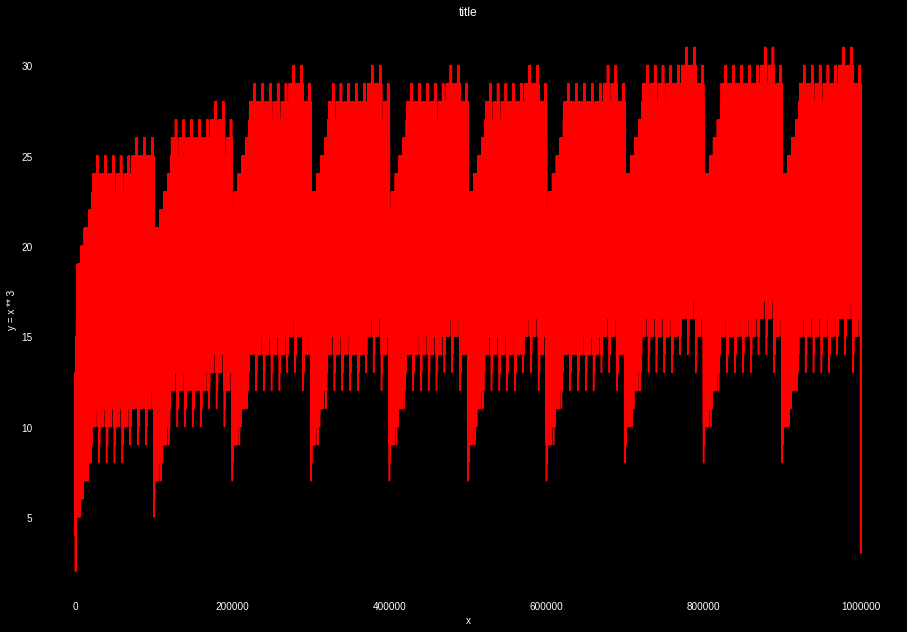

In [91]:
x = [n for n in range(1,1000000+1)]
y = [count_syllables(spell_number(n)) for n in x]

fig = plt.figure()

axes = fig.add_axes([0.1, 0.1, 2, 2])
axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y = x ** 3')
axes.set_title('title')

In [87]:
plt.style.available

['_classic_test',
 'seaborn-pastel',
 'seaborn-paper',
 'seaborn-whitegrid',
 'dark_background',
 'seaborn-notebook',
 'seaborn-colorblind',
 'seaborn-ticks',
 'seaborn-talk',
 'fast',
 'seaborn',
 'seaborn-muted',
 'tableau-colorblind10',
 'seaborn-dark-palette',
 'seaborn-poster',
 'seaborn-white',
 'fivethirtyeight',
 'seaborn-darkgrid',
 'classic',
 'seaborn-bright',
 'bmh',
 'Solarize_Light2',
 'ggplot',
 'seaborn-deep',
 'grayscale',
 'seaborn-dark']

In [90]:
plt.style.use('dark_background')